In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='Insulin'>

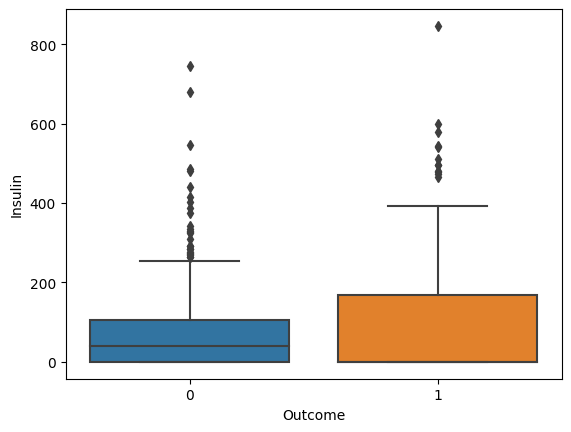

In [ ]:
sns.boxplot(x=df['Outcome'],y=df['Insulin'])

<Axes: xlabel='Outcome', ylabel='BMI'>

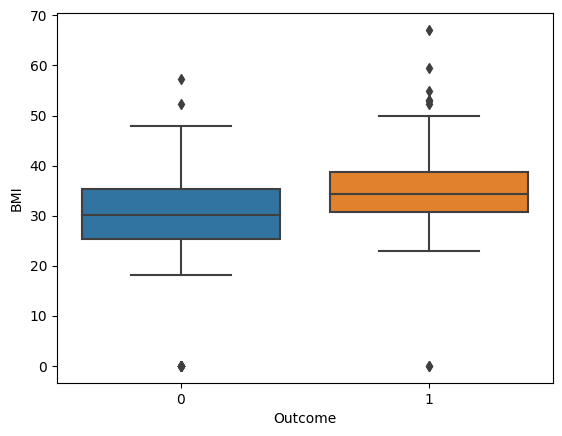

In [ ]:
sns.boxplot(x=df['Outcome'],y=df['BMI'])

<Axes: >

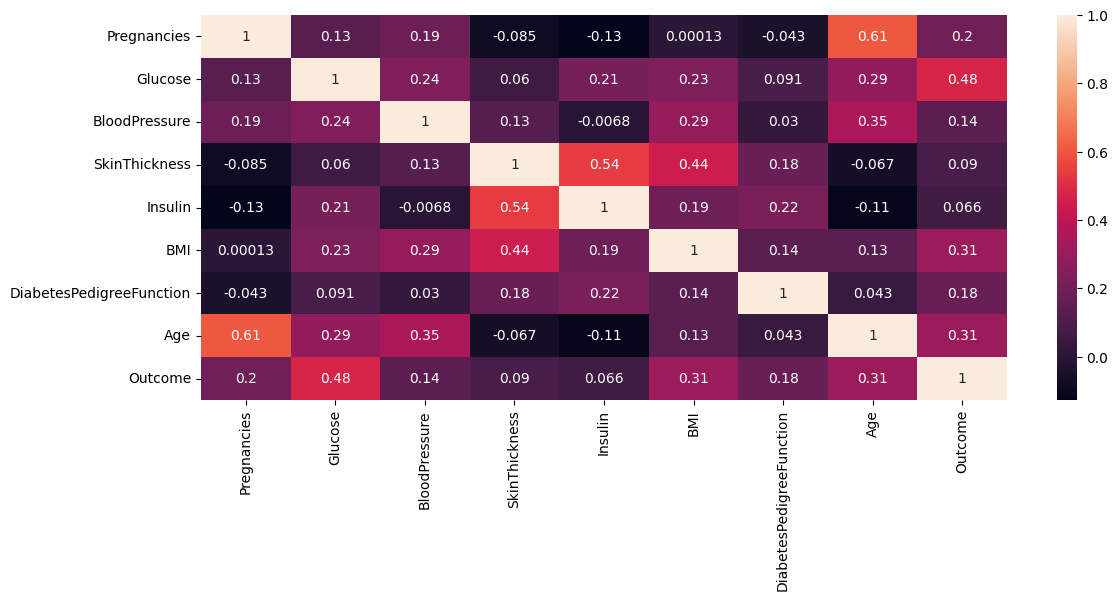

In [ ]:
plt.figure(figsize=(13,5))
sns.heatmap(df.corr(method='spearman'),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


In [ ]:
X_dev,X_test,Y_dev,Y_test=train_test_split(X,Y,test_size=0.2)
X_train,X_cv,Y_train,Y_cv=train_test_split(X_dev,Y_dev,test_size=0.25)

In [ ]:
model=LogisticRegression(C=1,max_iter=1000)


In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(C=1, max_iter=1000)

In [ ]:
model.score(X_train,Y_train)

0.7717391304347826

In [ ]:
model.score(X_cv,Y_cv)

0.8116883116883117

In [ ]:
model.coef_

array([[ 0.10978314,  0.03580362, -0.01092849,  0.0046242 , -0.00130317,
         0.09165637,  0.50407199,  0.00927917]])

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_cv=pd.DataFrame(scaler.fit_transform(X_cv),columns=X_cv.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [ ]:
train_score=[]
cv_score=[]
scaler = StandardScaler()
for la in np.arange(0.01,12000,100):
  model=LogisticRegression(C=1/la,class_weight={0:0.333,1:0.667})
  model.fit(X_train,Y_train)
  train_score.append(model.score(X_train,Y_train))
  cv_score.append(model.score(X_cv,Y_cv))

<Axes: >

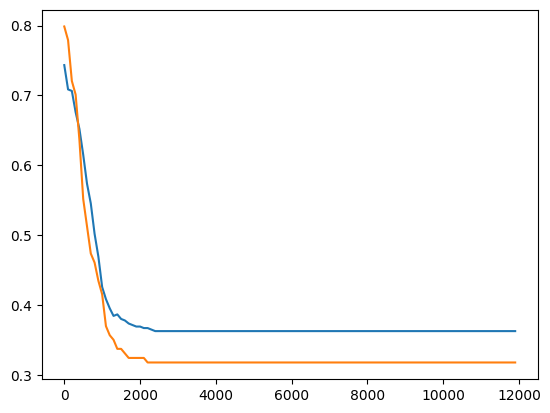

In [ ]:
sns.lineplot(x=np.arange(0.01,12000,100),y=train_score)
sns.lineplot(x=np.arange(0.01,12000,100),y=cv_score)


In [ ]:
ind=np.argmax(cv_score)

In [ ]:
best_la=0.01+100*ind

In [ ]:
model=LogisticRegression(C=1/best_la)
model.fit(X_train,Y_train)
model.score(X_cv,Y_cv)

0.8311688311688312

In [ ]:
model.score(X_test,Y_test)

0.7402597402597403

#GLM LOGREG

In [ ]:
import statsmodels.api as sm

In [ ]:
logreg=sm.GLM(Y_train.values.reshape(-1,1),sm.add_constant(X_train),family=sm.families.Binomial())

In [ ]:
print(logreg.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  460
Model:                            GLM   Df Residuals:                      451
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.41
Date:                Fri, 14 Jul 2023   Deviance:                       442.83
Time:                        13:10:29   Pearson chi2:                     445.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2936
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
X_train.drop(['Pregnancies','SkinThickness'],axis=1,inplace=True)
X_cv.drop(['Pregnancies','SkinThickness'],axis=1,inplace=True)
X_test.drop(['Pregnancies','SkinThickness'],axis=1,inplace=True)

In [ ]:
model=LogisticRegression(C=1/0.01,class_weight={0:0.333,1:0.667})
model.fit(X_train,Y_train)

LogisticRegression(C=100.0, class_weight={0: 0.333, 1: 0.667})

In [ ]:
model.score(X_cv,Y_cv)

0.7792207792207793

In [ ]:
model.score(X_test,Y_test)

0.7012987012987013

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)

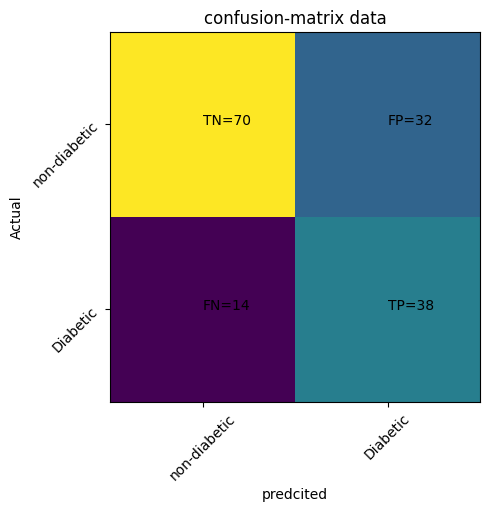

In [ ]:
plt.imshow(cm,interpolation='nearest')
classNames=['non-diabetic','Diabetic']
plt.title('confusion-matrix data')
plt.xlabel("predcited")
plt.ylabel('Actual')
tickmarks=np.arange(len(classNames))
plt.xticks(tickmarks,classNames,rotation=45)
plt.yticks(tickmarks,classNames,rotation=45)
s=[['TN','FP'],['FN','TP']]
for i in np.arange(2):
  for j in np.arange(2):
    plt.text(j,i,str(s[i][j])+'='+str(cm[i][j]) )

In [ ]:
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

In [ ]:
print('accuracy=',(TN+TP)/(TN+FP+TP+FN))

accuracy= 0.7012987012987013


In [ ]:
print('Precision=',TP/(TP+FP))
metrics.precision_score(Y_test,Y_pred)

Precision= 0.5428571428571428


0.5428571428571428

In [ ]:
from sklearn import metrics
print("Recall",TP/(TP+FN))
print(metrics.recall_score(Y_test,Y_pred))

Recall 0.7307692307692307
0.7307692307692307


In [ ]:
cm

array([[70, 32],
       [14, 38]])

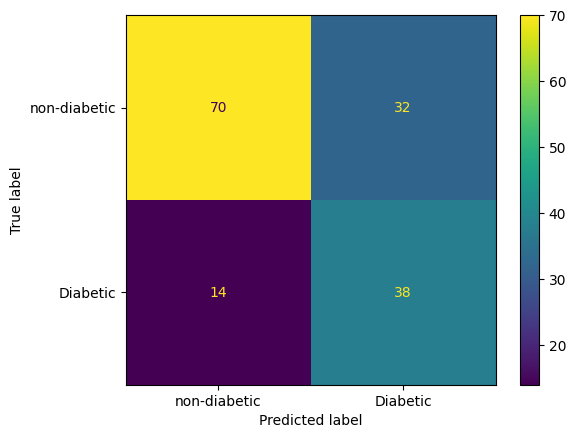

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot()# using function

In [ ]:
model.predict(X_test[0:10])

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
Y_pred_proba=model.predict_proba(X_test)[:,1]# we are only taking pred probabilites for diabetes

In [ ]:
from sklearn.preprocessing import binarize

In [ ]:
Y_pred_new=binarize([Y_pred_proba],threshold=0.70)[0]

In [ ]:
Y_pred_new

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
cm=confusion_matrix(Y_test,Y_pred_new)

In [ ]:
metrics.recall_score(Y_test,Y_pred_new)

0.5

In [ ]:
metrics.precision_score(Y_test,Y_pred_new)

0.7027027027027027

In [ ]:
metrics.accuracy_score(Y_test,Y_pred_new)

0.7597402597402597

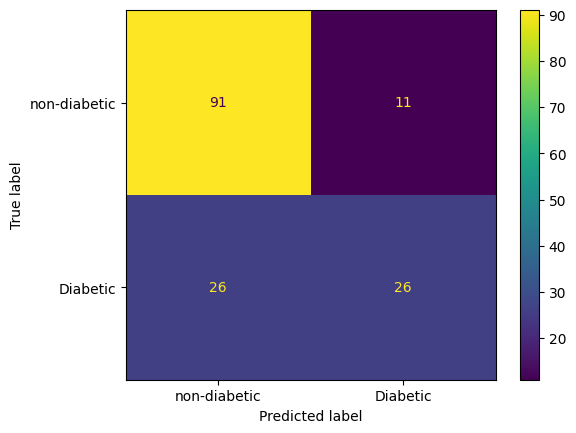

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot()

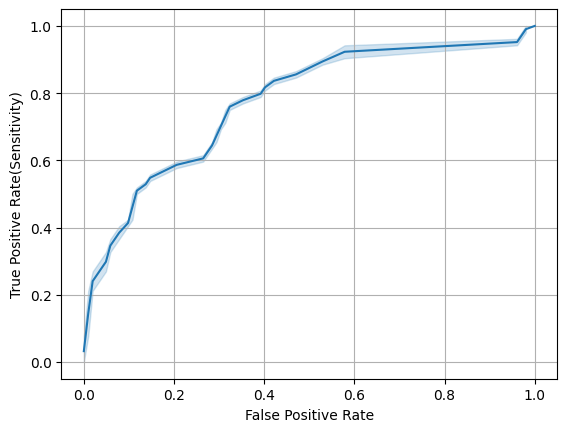

In [ ]:
fpr,tpr,thresholds=metrics.roc_curve(Y_test,Y_pred_proba)
sns.lineplot(x=fpr,y=tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid()

In [ ]:
print(metrics.roc_auc_score(Y_test,Y_pred_proba))

0.7756410256410257
